# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solver_ivp as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

#import project1.solver as mysolver
#import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')


Now, let's start to reproduce `demo1` and `demo2`.
Set
* t0 = 0 sec and tmax = 20 sec
* time step dt = 0.01
* The spring constant `K` = 1
* The mass `M` = 1
* Initial condition: `x=1`, `v=0`.

In [4]:
def f(x,v,args,t):
    """
    RHS of the ODE system.
    """
    beta=args[0]
    k=args[1]
    m=args[2]
    return [v,-beta*v-k*x/m]

t_span = [0, 20]
y0 = [1, 0]
k=1
m=1
beta=0
x,v,t=solver.solve_ivp(f, t_span, y0,'RK4',0.01,(beta,k,m))




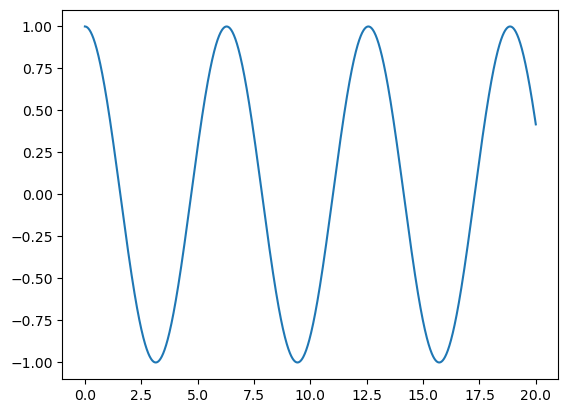

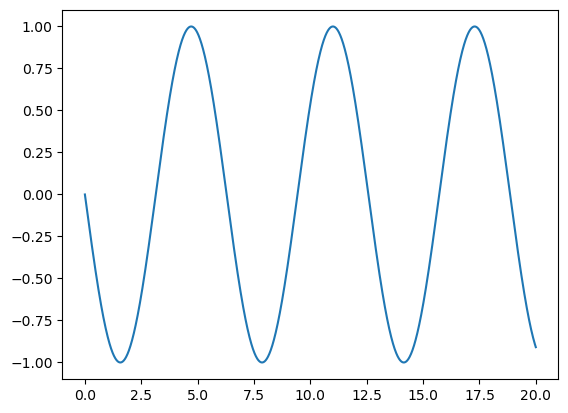

In [5]:
# visualize the results
plt.plot(t, x, label='x(t)')
plt.subplots()
plt.plot(t, v, label='v(t)')


# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
m\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). IC: at t=0, K=M=1, A=1, $\phi= 0$,$\lambda=0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

Text(0, 0.5, 'v(t)')

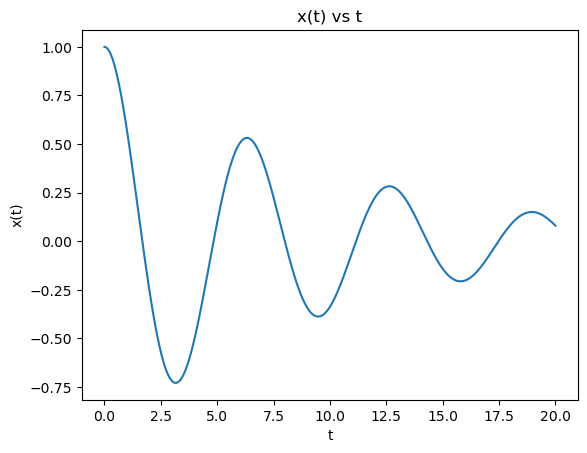

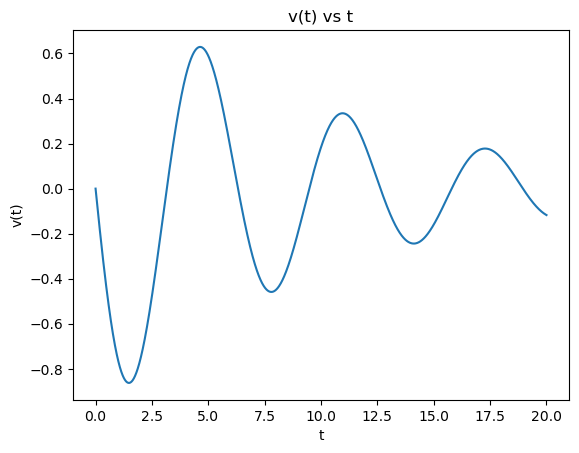

In [8]:
# TODO


def f(x,v,args,t):
    """
    RHS of the ODE system.
    """
    beta=args[0]
    k=args[1]
    m=args[2]
    return [v,-2*beta*v-k*x/m]

t_span = [0, 20]
y0 = [1, 0]
k=1
m=1
beta=0.1
x,v,t=solver.solve_ivp(f, t_span, y0,'RK4',0.01,(beta,k,m))
plt.plot(t, x, label='x(t)')
plt.title('x(t) vs t')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplots()
plt.plot(t, v, label='v(t)')
plt.title('v(t) vs t')
plt.xlabel('t')
plt.ylabel('v(t)')









### Analytical Solutions

The analytical solution is

$$
x(t) = A e^{-\gamma t} \left[\cos(\omega t + \phi) \right],
$$

where $\omega = \sqrt{\gamma^2 -\omega_0^2}$ or $\omega=\sqrt{\omega_0^2-\gamma^2}$.

Text(0, 0.5, 'v(t)')

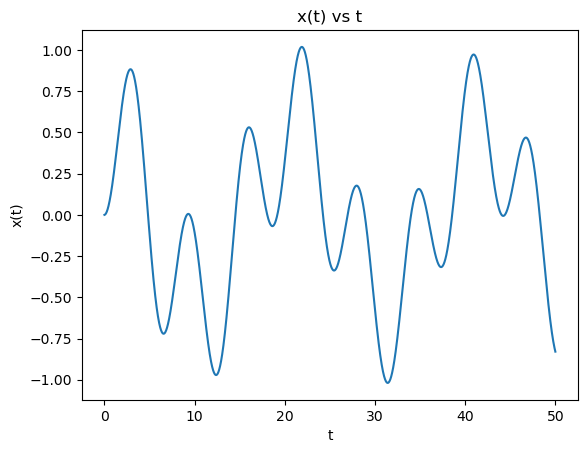

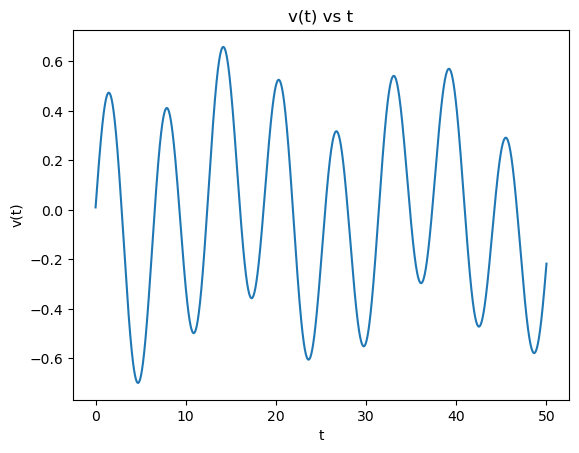

In [10]:
def f(x,v,arg,t):
    omega0=arg[0]
    lamb=arg[1]
    omegaf=arg[2]
    F0=arg[3]

    return [v,F0*np.cos(omegaf*t)-omega0**2*x-lamb*v]

t_span = [0, 20]
y0 = [1, 0]
A=0.01
omega0=1
lamb=0.01
F0=0.5
omegaf=0.3
omega1=np.sqrt(omega0**2-0.25*lamb**2)
omegaa=np.linspace(0.5,1.5,int(1/0.01))
x2,v2,t2=solver.solve_ivp(f,[0,50], [0,omega1*A],"RK4", 0.01,(omega0,lamb,omegaf,F0))
plt.plot(t2, x2, label='x(t)')
plt.title('x(t) vs t')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplots()
plt.plot(t2, v2, label='v(t)')
plt.title('v(t) vs t')
plt.xlabel('t')
plt.ylabel('v(t)')



## Part 2

Now, let's explore the evolution of the three general cases:

* Underdamping: $\omega_0^2 > \gamma^2$
* Critical damping: $\omega_0^2 = \gamma^2$
* Overdamping: $\omega_0^2 < \gamma^2$

Vary $\lambda$, to the corresponding conditions:
* $\lambda = 0.2$ ($\omega_0^2 > \gamma^2$)
* $\lambda = 2$ ($\omega_0^2 = \gamma^2$)
* $\lambda = 2.4$ ($\omega_0^2 < \gamma^2$)

In [4]:
# TODO








# Forced Oscillation

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a forced oscillator (from t=0 to 100).
* Set the inital conditions: A=1, K=M=1, $\lambda=0.2$, $F_0=0.1$ and $\omega_f=0.8$.
* Make plots of position(t), velocity(t), and total energy(t).

In [5]:
# TODO







# Resonance

* Resonance will happen when $\omega_0 = \omega_f$ without damping.
* Modify your `demo3` but set $\lambda=0$ and $\omega_f=1$.
* Re-run your simulation with $\lambda=0.1$ and $0.01$.


In [6]:
# TODO







# Using `scipy`

Compare the results of our solver (`mysolver`) with the `solve_ivp` in `scipy`.

In [ ]:
# TODO







# Performance

We could mesure the performance of our solver and compare it with scipy.

In [7]:
#TODO







Which one is faster?